In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pyspark.sql.functions as F




In [3]:
airbnb = pd.read_csv('/home/jiayin/assessment-rent-airbnb/data/airbnb.csv')
airbnb

,zipcode,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_value
0,1053,52.373021,4.868461,Entire home/apt,4,2.0,130,100.0
1,NaN,52.365755,4.941419,Private room,2,1.0,59,100.0
2,1053,52.369388,4.866972,Entire home/apt,4,1.0,95,90.0
3,1017,52.361905,4.888050,Entire home/apt,2,1.0,100,100.0
4,1016 AM,52.371533,4.887057,Entire home/apt,6,2.0,250,60.0
...,...,...,...,...,...,...,...,...
9908,NaN,52.366290,4.867420,Entire home/apt,2,0.0,473,98.0
9909,NaN,52.384120,4.880660,Entire home/apt,3,2.0,492,98.0
9910,NaN,52.357940,4.906880,Entire home/apt,4,5.0,1813,84.0
9911,NaN,52.346390,4.860560,Entire home/apt,2,1.0,399,89.0


In [3]:
df = pd.read_json('/home/jiayin/assessment-rent-airbnb/data/rentals.json')
df

,_id,additionalCostsRaw,areaSqm,city,crawlStatus,crawledAt,deposit,descriptionTranslated,detailsCrawledAt,energyLabel,...,propertyType,availability,registrationCost,rent,roommates,shower,smokingInside,source,title,toilet
0,[5d2b113a43cbfd7c77a998f4],\n € 50\n ...,14 m2,Rotterdam,done,[2019-07-26T22:18:23.018+0000],\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...",[2019-07-22T07:10:41.849+0000],Unknown,...,Room,26-06-'19 - Indefinite period,\n € 0\n ...,"€ 500,-",5,Shared,No,kamernet,West-Varkenoordseweg,Shared
1,[5d2b113a43cbfd7c77a9991a],\n € 0\n ...,30 m2,Amsterdam,done,[2019-08-10T22:28:46.099+0000],\n € 895\n ...,"Efficiently furnished, with a large balcony, a...",[2019-07-22T06:29:33.112+0000],Unknown,...,Studio,15-08-'19 - Indefinite period,\n € 0\n ...,"€ 950,- Utilities incl.",None,Own,No,kamernet,Parelstraat,Own
2,[5d2b113a43cbfd7c77a99931],\n -\n ...,11 m2,Amsterdam,done,[2019-10-02T22:00:33.141+0000],\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,[2019-07-21T08:44:32.816+0000],Unknown,...,Room,01-08-'19 - Indefinite period,\n -\n ...,"€ 1000,- Utilities incl.",1,Shared,Yes,kamernet,Zeilstraat,Shared
3,[5d2b113a43cbfd7c77a9994a],-,16 m2,Assen,done,[2019-07-18T22:00:31.018+0000],€ 290,De kamer is 16m2De kamer is voorzien van een z...,[2019-07-27T19:03:44.443+0000],Unknown,...,Room,16-06-'19 - Indefinite period,-,"€ 290,- Utilities incl.",4,Shared,Yes,kamernet,Ruiterakker,Shared
4,[5d2b113b43cbfd7c77a9997c],\n -\n ...,22 m2,Rotterdam,done,[2019-08-12T02:06:14.635+0000],\n € 500\n ...,,[2019-07-21T08:13:53.217+0000],Unknown,...,Room,01-08-'19 - Indefinite period,\n -\n ...,"€ 475,- Utilities incl.",1,Shared,No,kamernet,Zwart Janstraat,Shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46717,[5e5dada77fc8c93d83042924],€ 200,28 m2,Rotterdam,done,[2020-03-03T01:06:47.516+0000],€ 1000,"Recent available, completely furnished room in...",[2020-03-03T09:32:18.481+0000],Unknown,...,Room,01-03-'20 - Indefinite period,NA,"€ 800,-",Unknown,Shared,No,kamernet,Oudedijk,Shared
46718,[5e5daddf7fc8c93d83043cfd],NA,16 m2,Harmelen,done,[2020-03-03T01:07:43.775+0000],-,,[2020-03-03T08:30:24.981+0000],Unknown,...,Room,08-02-'20 - Indefinite period,NA,"€ 400,- Utilities incl.",2,Shared,No,kamernet,Wilhelminalaan,Shared
46719,[5e5dade07fc8c93d83043d2d],€ 300,30 m2,Rotterdam,done,[2020-03-03T01:07:43.947+0000],€ 1250,"Beautiful, new furnished room/apartment in 5 m...",[2020-03-03T02:35:17.266+0000],Unknown,...,Room,01-03-'20 - Indefinite period,NA,"€ 950,-",Unknown,Shared,No,kamernet,Oudedijk,Shared
46720,[5e5dade27fc8c93d83043e7b],€ 300,35 m2,Rotterdam,done,[2020-03-03T01:07:45.950+0000],€ 1350,"Large, completely furnished room in 5 minutes ...",[2020-03-03T06:31:13.654+0000],Unknown,...,Room,01-03-'20 - Indefinite period,NA,"€ 1050,- Utilities incl.",6,Shared,No,kamernet,Oudedijk,Shared


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("RevoDataIngestion").getOrCreate()
airbnb_df = spark.read.option("header", "true").csv("../data/airbnb.csv")
rentals_df = spark.read.json("../data/rentals.json")
airbnb_df.show()
rentals_df.show()

+-------+-----------+-----------+---------------+------------+--------+-----+-------------------+
|zipcode|   latitude|  longitude|      room_type|accommodates|bedrooms|price|review_scores_value|
+-------+-----------+-----------+---------------+------------+--------+-----+-------------------+
|   1053|52.37302064|4.868460923|Entire home/apt|           4|     2.0|  130|              100.0|
|   null|52.36575451|4.941419235|   Private room|           2|     1.0|   59|              100.0|
|   1053|52.36938767|4.866972319|Entire home/apt|           4|     1.0|   95|               90.0|
|   1017|52.36190508|4.888050037|Entire home/apt|           2|     1.0|  100|              100.0|
|1016 AM|52.37153345|4.887057291|Entire home/apt|           6|     2.0|  250|               60.0|
|1016 AM| 52.3713592|4.888072287|   Private room|           4|     1.0|  140|               null|
|1016 AM| 52.3704458|4.889069478|   Private room|           2|     1.0|  115|               90.0|
|1071 VV|52.35564811

+--------------------+--------------------+-------+--------------------+-------------------+-----------+--------------------+--------------------+---------------------+--------------------+-----------+--------------------+-----------+-------+--------+------------+-------+--------------------+-------------+------+------------+-------------+--------------------+--------------------+----+----------+---------+------------+--------------------+--------------------+---------+------+-------------+--------+--------------------+------+
|                 _id|  additionalCostsRaw|areaSqm|        availability|               city|crawlStatus|           crawledAt|             deposit|descriptionTranslated|    detailsCrawledAt|energyLabel|         firstSeenAt|    furnish| gender|internet|isRoomActive|kitchen|          lastSeenAt|     latitude|living|   longitude|matchCapacity|     pageDescription|           pageTitle|pets|postalCode|postedAgo|propertyType|    registrationCost|                rent|roo

In [9]:
airbnb_df.select("review_scores_value").distinct().orderBy('review_scores_value').show()

+-------------------+
|review_scores_value|
+-------------------+
|               null|
|              100.0|
|               20.0|
|               30.0|
|               40.0|
|               47.0|
|               50.0|
|               60.0|
|               65.0|
|               70.0|
|               73.0|
|               74.0|
|               75.0|
|               76.0|
|               77.0|
|               78.0|
|               80.0|
|               81.0|
|               82.0|
|               83.0|
+-------------------+
only showing top 20 rows



In [98]:
def calculate_revenue(rentals_df, airbnb_df):
    # Calculate average rental revenue per postcode
    rentals_revenue = rentals_df.groupBy("postcode").agg({"price": "avg"}).withColumnRenamed("avg(price)", "average_rental_price")
    
    # Calculate average Airbnb revenue per postcode
    airbnb_revenue = airbnb_df.groupBy("postcode").agg({"price_per_night": "avg"}).withColumnRenamed("avg(price_per_night)", "average_airbnb_price")
    
    # Combine the results
    combined_revenue = rentals_revenue.join(airbnb_revenue, on="postcode", how="outer")
    
    return combined_revenue

In [107]:
rentals_df.describe()
rentals_df.select(col('rent')).distinct().show(rentals_df.count(),truncate=100)


DataFrame[summary: string, additionalCostsRaw: string, areaSqm: string, availability: string, city: string, crawlStatus: string, deposit: string, descriptionTranslated: string, energyLabel: string, furnish: string, gender: string, internet: string, isRoomActive: string, kitchen: string, latitude: string, living: string, longitude: string, matchCapacity: string, pageDescription: string, pageTitle: string, pets: string, postalCode: string, postedAgo: string, propertyType: string, registrationCost: string, rent: string, roommates: string, shower: string, smokingInside: string, source: string, title: string, toilet: string]

+-------------------------+
|                     rent|
+-------------------------+
|                  € 499,-|
|                  € 719,-|
|                 € 1380,-|
|                 € 1235,-|
| € 655,-  Utilities incl.|
|€ 1975,-  Utilities incl.|
|                  € 557,-|
| € 165,-  Utilities incl.|
|                 € 1665,-|
|€ 1077,-  Utilities incl.|
|                  € 370,-|
|                 € 1540,-|
| € 334,-  Utilities incl.|
|                 € 1175,-|
| € 278,-  Utilities incl.|
| € 940,-  Utilities incl.|
|                  € 879,-|
| € 309,-  Utilities incl.|
|                  € 791,-|
| € 666,-  Utilities incl.|
|                  € 319,-|
|                  € 329,-|
|                 € 1500,-|
|                 € 1840,-|
| € 428,-  Utilities incl.|
|                  € 460,-|
|€ 1045,-  Utilities incl.|
|€ 1495,-  Utilities incl.|
|                  € 994,-|
| € 275,-  Utilities incl.|
| € 447,-  Utilities incl.|
|                  € 715,-|
|                  €

In [55]:
def zip_to_df(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip:
        file_name = zip.infolist()[0].filename
        with zip.open(file_name) as file:
            if file_name.endswith('json'):
                return spark.read.json(file)
            elif file_name.endswith('csv'):
                return spark.read.csv(file, header=True, inferSchema=True)

In [91]:
zip_path = '/home/jiayin/assessment-rent-airbnb/data/airbnb.zip'
with zipfile.ZipFile(zip_path, 'r') as zip:
    file_name = zip.infolist()[0].filename
    with zip.open(file_name) as file:
        test = spark.read.csv(file, header=True, inferSchema=True)

TypeError: path can be only string, list or RDD

In [86]:
import zipfile
import tempfile
import os

def read_zip_to_dataframe(zip_file_path, file_name):

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        file_name = zip_ref.infolist()[0].filename
        zip_ref.extract(file_name, '../data')
    
    # Construct the full path of the extracted file
    extracted_file_path = os.path.join('../data', file_name)
    
    # Return the path of the extracted file
    return extracted_file_path

zip_path = '/home/jiayin/assessment-rent-airbnb/data/airbnb.zip'       
test = zip_to_df(zip_path)

In [92]:
import zipfile
zip_file_path = '/home/jiayin/assessment-rent-airbnb/data/airbnb.zip'  
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('../data')
    file_name = zip_ref.infolist()[0].filename


# Construct the full path of the extracted file
extracted_file_path = os.path.join('./data', file_name)
extracted_file_path

'./data/airbnb.csv'

In [69]:
df = spark.read.json('/home/jiayin/assessment-rent-airbnb/data/rentals.json')

num_cols = ['additionalCostsRaw', 'areaSqm', 'deposit','registrationCost','rent'] 
 
expressions = [f"regexp_extract({col}, r'([0-9,\.]+)', 1) AS _{col}" for col in num_cols]

df = df.selectExpr('*', *expressions)
num_cols = ['_additionalCostsRaw', '_areaSqm', '_deposit','_registrationCost','_rent'] 

expressions = [
    f"CASE WHEN {col} IS NOT NULL THEN CAST(REPLACE({col}, ',', '.') AS FLOAT) ELSE NULL END AS {col}"
    for col in num_cols
]
df = df.selectExpr("*", *expressions)



In [78]:
df = spark.read.json('/home/jiayin/assessment-rent-airbnb/data/rentals.json')

num_cols = ['additionalCostsRaw', 'areaSqm', 'deposit', 'registrationCost', 'rent']

price_columns = ['additionalCostsRaw', 'deposit', 'registrationCost','rent']  

cast_to_number = [
    f"CASE WHEN regexp_extract({col}, r'([0-9,\.]+)', 1) IS NOT NULL \
        THEN CAST(REPLACE(regexp_extract({col}, r'([0-9,\.]+)', 1), ',', '.') AS FLOAT) \
    ELSE NULL END AS {col}"
    for col in num_cols
]

format_price_columns = [
    f"FORMAT_NUMBER({col}, 2) AS {col}" for col in price_columns
]
non_numeric_columns = [col for col in df.columns if col not in num_cols]
df = df.selectExpr(*non_numeric_columns, *cast_to_number)

# df = df.selectExpr("*", *format_price_columns)

# Show the result
df.show()

+--------------------+--------------------+-------------------+-----------+--------------------+---------------------+--------------------+-----------+--------------------+-----------+-------+--------+------------+-------+--------------------+-------------+------+------------+-------------+--------------------+--------------------+----+----------+---------+------------+---------+------+-------------+--------+--------------------+------+------------------+-------+-------+----------------+------+
|                 _id|        availability|               city|crawlStatus|           crawledAt|descriptionTranslated|    detailsCrawledAt|energyLabel|         firstSeenAt|    furnish| gender|internet|isRoomActive|kitchen|          lastSeenAt|     latitude|living|   longitude|matchCapacity|     pageDescription|           pageTitle|pets|postalCode|postedAgo|propertyType|roommates|shower|smokingInside|  source|               title|toilet|additionalCostsRaw|areaSqm|deposit|registrationCost|  rent|


In [2]:
def apply_column_expressions(df, cols, expression):
    other_cols =  [col for col in df.columns if col not in cols]
    df = df.selectExpr(*other_cols, *expression)
    return df

def normalize_date_format(date_str):
    cleaned_date = F.regexp_replace(date_str, "'", "") 
    cleaned_date = F.to_date(cleaned_date, 'dd-MM-yy') 
    return  cleaned_date

In [ ]:
df = spark.read.json('/home/jiayin/assessment-rent-airbnb/data/rentals.json')
num_cols = ['additionalCostsRaw', 'areaSqm', 'deposit', 'registrationCost', 'rent']
price_columns = ['additionalCostsRaw', 'deposit', 'registrationCost','rent']  
cast_to_number = [f"CASE WHEN regexp_extract({col}, r'([0-9,\.]+)', 1) IS NOT NULL \
                THEN CAST(REPLACE(regexp_extract({col}, r'([0-9,\.]+)', 1), ',', '.') AS FLOAT) \
                ELSE NULL END AS {col}"
                for col in num_cols]
format_price_columns = [f"FORMAT_NUMBER({col}, 2) AS {col}" for col in price_columns]



df = apply_column_expressions(df, num_cols, cast_to_number)
df = apply_column_expressions(df, price_columns, format_price_columns)



df = df.withColumn('dates', F.split(df['availability'], ' - '))\
    .withColumn('availability_start_date', normalize_date_format(F.col('dates')[0])) \
    .withColumn('availability_end_date', 
                F.when(F.col('dates')[1] == "Indefinite period", None)
                .otherwise(normalize_date_format(F.col('dates')[1])))


# Drop the intermediate 'availability' and 'dates' columns
df = df.drop('availability', 'dates')


cols = ['_id','city','title','energyLabel','propertyType','areaSqm',\
    'availability_start_date','availability_end_date','roommates',\
    'smokingInside','shower','toilet',\
    'rent','registrationCost','deposit','additionalCostsRaw',]


df = df.select(cols).withColumnRenamed('title','streetAddress')
df.show()

+--------------------+-------------------+--------------------+-----------+------------+-------+-----------------------+---------------------+---------+-------------+------+------+--------+----------------+--------+------------------+
|                 _id|               city|       streetAddress|energyLabel|propertyType|areaSqm|availability_start_date|availability_end_date|roommates|smokingInside|shower|toilet|    rent|registrationCost| deposit|additionalCostsRaw|
+--------------------+-------------------+--------------------+-----------+------------+-------+-----------------------+---------------------+---------+-------------+------+------+--------+----------------+--------+------------------+
|[5d2b113a43cbfd7c...|          Rotterdam|West-Varkenoordseweg|    Unknown|        Room|   14.0|             2019-06-26|                 null|        5|           No|Shared|Shared|  500.00|            0.00|  500.00|             50.00|
|[5d2b113a43cbfd7c...|          Amsterdam|         Parelstra

In [119]:
!pyspark --version

9471.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


24/11/01 17:59:56 WARN Utils: Your hostname, PC05775 resolves to a loopback address: 127.0.1.1; using 172.21.36.156 instead (on interface eth0)
24/11/01 17:59:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.4.0
      /_/
                        
Using Scala version 2.12.17, OpenJDK 64-Bit Server VM, 1.8.0_422
Branch HEAD
Compiled by user xinrong.meng on 2023-04-07T02:18:01Z
Revision 87a5442f7ed96b11051d8a9333476d080054e5a0
Url https://github.com/apache/spark
Type --help for more information.


In [85]:
df.select('availability').show(truncate=100)

+-----------------------------+
|                 availability|
+-----------------------------+
|26-06-'19 - Indefinite period|
|15-08-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|16-06-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|        01-09-'19 - 31-08-'20|
|15-07-'19 - Indefinite period|
|15-08-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|        01-08-'19 - 01-08-'20|
|08-07-'19 - Indefinite period|
|26-06-'19 - Indefinite period|
|28-06-'19 - Indefinite period|
|28-06-'19 - Indefinite period|
|08-07-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
|22-07-'19 - Indefinite period|
|01-08-'19 - Indefinite period|
+-----------------------------+
only showing top 20 rows



In [87]:
# df = spark.read.json('/home/jiayin/assessment-rent-airbnb/data/rentals.json')

df = df.withColumn('dates', F.split(df['availability'], ' - '))\
    .withColumn('availability_start_date', F.col('dates')[0])\
    .withColumn('availability_end_date',F.when(F.size(F.col('dates')) > 1\
                                  , F.col('dates')[1])\
     .otherwise(F.lit(None))
)
df = df.drop('availability','dates')
df.show()

+--------------------+--------------------+-------+-------------------+-----------+--------------------+--------------------+---------------------+--------------------+-----------+--------------------+-----------+-------+--------+------------+-------+--------------------+-------------+------+------------+-------------+--------------------+--------------------+----+----------+---------+------------+--------------------+--------------------+---------+------+-------------+--------+--------------------+------+-----------------------+---------------------+
|                 _id|  additionalCostsRaw|areaSqm|               city|crawlStatus|           crawledAt|             deposit|descriptionTranslated|    detailsCrawledAt|energyLabel|         firstSeenAt|    furnish| gender|internet|isRoomActive|kitchen|          lastSeenAt|     latitude|living|   longitude|matchCapacity|     pageDescription|           pageTitle|pets|postalCode|postedAgo|propertyType|    registrationCost|                rent

In [ ]:
def load_and_clean_data(df, cols):
    df = df.withColumn('rent_in_euros',  regexp_extract(df[rent_col], r'([0-9]+)', 1))\
        .withColumn('zipcode', regexp_replace(zipcode_col, ' ', ''))
    return df

In [5]:
import geopandas as gpd

amsterdam_areas = gpd.read_file("/home/jiayin/assessment-rent-airbnb/data/geo/amsterdam_areas.geojson")
post_codes = gpd.read_file("/home/jiayin/assessment-rent-airbnb/data/geo/post_codes.geojson")
amsterdam_areas.head(10)
post_codes.head(10)


/home/jiayin/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,Buurtcombinatie_code,Buurtcombinatie,Stadsdeel_code,Opp_m2,geometry
0,T92,Amstel III/Bullewijk,T,5273610,"POLYGON ((4.97185 52.28435, 4.97001 52.28636, ..."
1,T93,"Bijlmer Centrum (D,F,H)",T,3158100,"POLYGON ((4.97143 52.30798, 4.96518 52.31480, ..."
2,T97,Gein,T,1921430,"POLYGON ((5.00796 52.30154, 5.00593 52.30154, ..."
3,E18,Kinkerbuurt,E,273871,"POLYGON ((4.87081 52.36684, 4.86867 52.36626, ..."
4,E21,Overtoomse Sluis,E,308628,"POLYGON ((4.86554 52.36028, 4.86470 52.36009, ..."
5,E38,Erasmuspark,E,405114,"POLYGON ((4.85681 52.37684, 4.85467 52.37659, ..."
6,E42,Hoofdweg e.o.,E,419725,"POLYGON ((4.85826 52.36420, 4.85764 52.36424, ..."
7,A07,De Weteringschans,A,629236,"POLYGON ((4.90215 52.36268, 4.90223 52.36252, ..."
8,A09,Oostelijke Eilanden/Kadijken,A,1238940,"POLYGON ((4.91346 52.37160, 4.91403 52.37183, ..."
9,N60,Volewijck,N,1285140,"POLYGON ((4.92228 52.39652, 4.92226 52.39640, ..."


,geo_point_2d,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry
0,"{'lon': 4.87442954059, 'lat': 52.3780276979}",1052,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.88339 52.38702, 4.88338 52.38700, ..."
1,"{'lon': 4.99293770354, 'lat': 52.3084665685}",1108,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.99756 52.31826, 4.99764 52.31807, ..."
2,"{'lon': 4.92895431703, 'lat': 52.446778094}",1121,2020,415,27,Noord-Holland,Landsmeer,"POLYGON ((4.94869 52.48773, 4.94891 52.48769, ..."
3,"{'lon': 5.14069481141, 'lat': 52.2193452841}",1216,2020,402,27,Noord-Holland,Hilversum,"POLYGON ((5.15169 52.22434, 5.15230 52.22416, ..."
4,"{'lon': 5.15688566902, 'lat': 52.239440273}",1217,2020,402,27,Noord-Holland,Hilversum,"MULTIPOLYGON (((5.17144 52.22655, 5.17143 52.2..."
5,"{'lon': 5.17276719327, 'lat': 52.2802085263}",1401,2020,1942,27,Noord-Holland,Gooise Meren,"POLYGON ((5.16535 52.28598, 5.16536 52.28595, ..."
6,"{'lon': 5.26996101791, 'lat': 52.7244759575}",1602,2020,388,27,Noord-Holland,Enkhuizen,"POLYGON ((5.27122 52.74190, 5.27125 52.74190, ..."
7,"{'lon': 5.01272495601, 'lat': 52.6211430676}",1634,2020,1598,27,Noord-Holland,Koggenland,"POLYGON ((5.01904 52.63099, 5.01925 52.63096, ..."
8,"{'lon': 4.82907180891, 'lat': 52.6497549971}",1703,2020,398,27,Noord-Holland,Heerhugowaard,"MULTIPOLYGON (((4.83413 52.64668, 4.83391 52.6..."
9,"{'lon': 4.75023549661, 'lat': 52.8086126283}",1751,2020,441,27,Noord-Holland,Schagen,"POLYGON ((4.78487 52.81882, 4.78837 52.81659, ..."


In [35]:
from shapely.geometry import Point

airbnb_df = gpd.read_file("/home/jiayin/assessment-rent-airbnb/data/airbnb.csv")
airbnb_df['longitude'] = pd.to_numeric(airbnb_df['longitude'], errors='coerce')
airbnb_df['latitude'] = pd.to_numeric(airbnb_df['latitude'], errors='coerce')

airbnb_df['geometry'] = airbnb_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
airbnb_gdf = gpd.GeoDataFrame(airbnb_df, geometry='geometry', crs="EPSG:28992")  # Make sure CRS matches postcode_df


post_codes = gpd.read_file("/home/jiayin/assessment-rent-airbnb/data/geo/post_codes.geojson")
postcode_df = post_codes.to_crs("EPSG:28992")  # Align CRS with airbnb_gdf

# Perform spatial join to add `pc4_code` to Airbnb data
airbnb_with_postcode = gpd.sjoin(airbnb_gdf, postcode_df[['pc4_code', 'geometry']], how='left', op='within')



/home/jiayin/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/home/jiayin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [49]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

airbnb_df = pd.read_csv("/home/jiayin/assessment-rent-airbnb/data/airbnb.csv")


airbnb_df['longitude'] = pd.to_numeric(airbnb_df['longitude'], errors='coerce')
airbnb_df['latitude'] = pd.to_numeric(airbnb_df['latitude'], errors='coerce')


airbnb_df['geometry'] = airbnb_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
airbnb_gdf = gpd.GeoDataFrame(airbnb_df, geometry='geometry', crs="EPSG:4326")

airbnb_gdf = airbnb_gdf.to_crs("EPSG:28992")

post_codes = gpd.read_file("/home/jiayin/assessment-rent-airbnb/data/geo/post_codes.geojson")
postcode_df = post_codes.to_crs("EPSG:28992")

airbnb_with_postcode = gpd.sjoin(airbnb_gdf, postcode_df[['pc4_code', 'geometry']], how='left', predicate='within')

print(airbnb_with_postcode[['longitude', 'latitude', 'pc4_code']].head())

/home/jiayin/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


   longitude   latitude pc4_code
0   4.868461  52.373021     1052
1   4.941419  52.365755     1095
2   4.866972  52.369388     1053
3   4.888050  52.361905     1017
4   4.887057  52.371533     1016


In [44]:
airbnb_with_postcode

,zipcode,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_value,geometry,index_right,pc4_code
0,1053,52.373021,4.868461,Entire home/apt,4,2.0,130,100.0,POINT (119673.854 487364.754),0.0,1052
1,NaN,52.365755,4.941419,Private room,2,1.0,59,100.0,POINT (124637.255 486523.238),332.0,1095
2,1053,52.369388,4.866972,Entire home/apt,4,1.0,95,90.0,POINT (119569.580 486961.266),96.0,1053
3,1017,52.361905,4.888050,Entire home/apt,2,1.0,100,100.0,POINT (120999.329 486118.636),181.0,1017
4,1016 AM,52.371533,4.887057,Entire home/apt,6,2.0,250,60.0,POINT (120939.100 487190.382),352.0,1016
...,...,...,...,...,...,...,...,...,...,...,...
9908,NaN,52.366290,4.867420,Entire home/apt,2,0.0,473,98.0,POINT (119597.597 486616.392),96.0,1053
9909,NaN,52.384120,4.880660,Entire home/apt,3,2.0,492,98.0,POINT (120513.227 488593.826),0.0,1052
9910,NaN,52.357940,4.906880,Entire home/apt,4,5.0,1813,84.0,POINT (122279.024 485668.803),386.0,1091
9911,NaN,52.346390,4.860560,Entire home/apt,2,1.0,399,89.0,POINT (119114.281 484405.642),199.0,1076


In [48]:
airbnb_with_postcode['zipcodeEnhanced'] = airbnb_with_postcode['zipcode'].fillna(airbnb_with_postcode['pc4_code'])
airbnb_with_postcode[['zipcode','price','pc4_code','zipcodeEnhanced']]

,zipcode,price,pc4_code,zipcodeEnhanced
0,1053,130,1052,1053
1,NaN,59,1095,1095
2,1053,95,1053,1053
3,1017,100,1017,1017
4,1016 AM,250,1016,1016 AM
...,...,...,...,...
9908,NaN,473,1053,1053
9909,NaN,492,1052,1052
9910,NaN,1813,1091,1091
9911,NaN,399,1076,1076


In [8]:
amsterdam_areas.info()
''
post_codes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Buurtcombinatie_code  99 non-null     object  
 1   Buurtcombinatie       99 non-null     object  
 2   Stadsdeel_code        99 non-null     object  
 3   Opp_m2                99 non-null     object  
 4   geometry              99 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 4.0+ KB


''

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geo_point_2d  474 non-null    object  
 1   pc4_code      474 non-null    object  
 2   year          474 non-null    object  
 3   gem_code      474 non-null    object  
 4   prov_code     474 non-null    object  
 5   prov_name     474 non-null    object  
 6   gem_name      474 non-null    object  
 7   geometry      474 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 29.8+ KB


In [6]:
latlonpostcodes = pd.json_normalize(post_codes['geo_point_2d'])
new_postcodes = latlonpostcodes.join(post_codes)
new_postcodes = new_postcodes[['lon','lat','pc4_code']]
new_postcodes = spark.createDataFrame(new_postcodes) 
new_postcodes.show()

+-------------+-------------+--------+
|          lon|          lat|pc4_code|
+-------------+-------------+--------+
|4.87442954059|52.3780276979|    1052|
|4.99293770354|52.3084665685|    1108|
|4.92895431703| 52.446778094|    1121|
|5.14069481141|52.2193452841|    1216|
|5.15688566902| 52.239440273|    1217|
|5.17276719327|52.2802085263|    1401|
|5.26996101791|52.7244759575|    1602|
|5.01272495601|52.6211430676|    1634|
|4.82907180891|52.6497549971|    1703|
|4.75023549661|52.8086126283|    1751|
|4.74974292076|52.9573141568|    1782|
| 4.7467162235|52.9008878454|    1787|
|4.76551351471|52.6277129954|    1821|
|4.65870207446|52.4842270167|    1941|
|4.68537792869|52.5186058133|    1963|
|4.86124696323|52.3924458199|    1014|
|4.94218358684|52.3078968038|    1101|
|5.05991798783|52.5031528565|    1132|
|5.04045815042|52.4322084942|    1153|
|4.83772890356|52.3175666114|    1182|
+-------------+-------------+--------+
only showing top 20 rows



In [13]:
sparkairbnb = spark.createDataFrame(airbnb) 
new_df = sparkairbnb.join(new_postcodes, on = [new_postcodes.lat == sparkairbnb.latitude, new_postcodes.lon == sparkairbnb.longitude])
new_df.show()

+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+
|zipcode|latitude|longitude|room_type|accommodates|bedrooms|price|review_scores_value|lon|lat|pc4_code|
+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+
+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+



In [20]:
# new_postcodes.show()
roundedpc = new_postcodes.withColumn('latRounded', F.round(col('lat'), 8))\
    .withColumn('lonRounded', F.round(col('lon'), 8))
roundedairbnb = sparkairbnb.withColumn('latRounded', F.round(col('latitude'), 8))\
    .withColumn('lonRounded', F.round(col('longitude'), 8))


In [23]:
roundedpc.show()


+-------------+-------------+--------+-----------+----------+
|          lon|          lat|pc4_code| latRounded|lonRounded|
+-------------+-------------+--------+-----------+----------+
|4.87442954059|52.3780276979|    1052| 52.3780277|4.87442954|
|4.99293770354|52.3084665685|    1108|52.30846657| 4.9929377|
|4.92895431703| 52.446778094|    1121|52.44677809|4.92895432|
|5.14069481141|52.2193452841|    1216|52.21934528|5.14069481|
|5.15688566902| 52.239440273|    1217|52.23944027|5.15688567|
|5.17276719327|52.2802085263|    1401|52.28020853|5.17276719|
|5.26996101791|52.7244759575|    1602|52.72447596|5.26996102|
|5.01272495601|52.6211430676|    1634|52.62114307|5.01272496|
|4.82907180891|52.6497549971|    1703|  52.649755|4.82907181|
|4.75023549661|52.8086126283|    1751|52.80861263| 4.7502355|
|4.74974292076|52.9573141568|    1782|52.95731416|4.74974292|
| 4.7467162235|52.9008878454|    1787|52.90088785|4.74671622|
|4.76551351471|52.6277129954|    1821|  52.627713|4.76551351|
|4.65870

In [26]:
roundedairbnb.join(roundedpc, on =['latRounded','lonRounded']).show()

+----------+----------+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+
|latRounded|lonRounded|zipcode|latitude|longitude|room_type|accommodates|bedrooms|price|review_scores_value|lon|lat|pc4_code|
+----------+----------+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+
+----------+----------+-------+--------+---------+---------+------------+--------+-----+-------------------+---+---+--------+



<Axes: >

Text(0.5, 1.0, 'Amsterdam Areas')

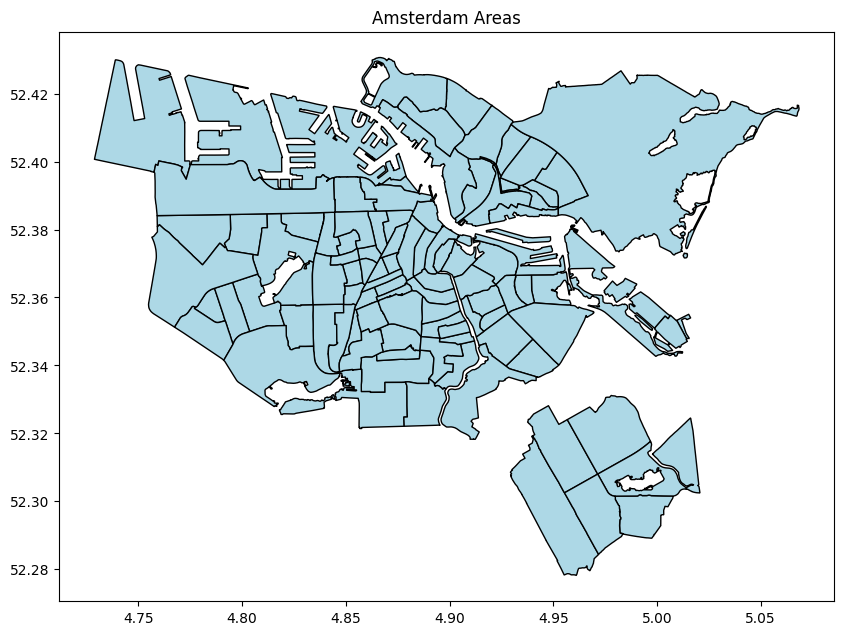

<Axes: >

Text(0.5, 1.0, 'Post Codes in Amsterdam')

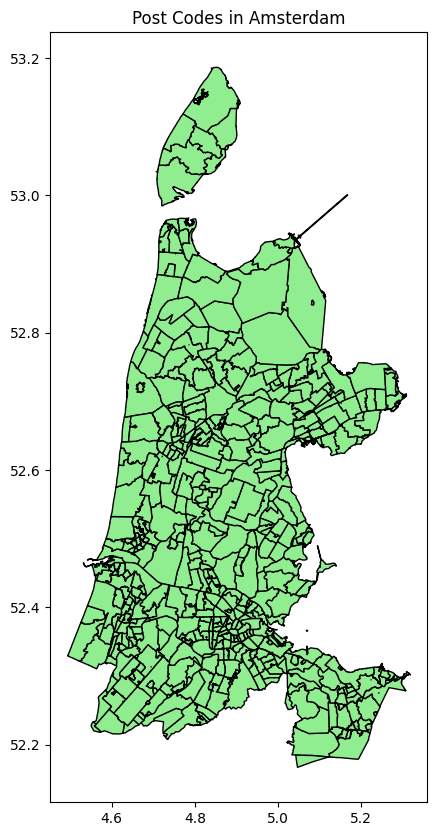

In [34]:
import matplotlib.pyplot as plt

# Plot Amsterdam areas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
amsterdam_areas.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Amsterdam Areas')
plt.show()

# Plot post codes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
post_codes.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.set_title('Post Codes in Amsterdam')
plt.show()

In [16]:
# to_crs(epsg=28992): 
# This function changes the CRS of your GeoDataFrame to a projected system that measures distances and areas in meters
amsterdam_areas = amsterdam_areas.to_crs(epsg=28992)

# Calculate the area in square meters
amsterdam_areas['area_m2'] = amsterdam_areas.geometry.area

# Get average area by neighborhood
average_area = amsterdam_areas.groupby('Buurtcombinatie')['area_m2'].mean()
average_area

Buurtcombinatie
Amstel III/Bullewijk           5.273468e+06
Apollobuurt                    9.427752e+05
Banne Buiksloot                1.829647e+06
Bedrijventerrein Sloterdijk    7.698812e+06
Betondorp                      1.133842e+06
                                   ...     
Westlandgracht                 1.496124e+06
Willemspark                    6.983738e+05
Zeeburgereiland/Nieuwe Diep    2.494367e+06
Zuid Pijp                      3.675868e+05
Zuidas                         2.166495e+06
Name: area_m2, Length: 99, dtype: float64